In [1]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram

In [2]:
svbackend = BasicAer.get_backend('statevector_simulator')
qmbackend = BasicAer.get_backend('qasm_simulator')

# BV Algorithm:

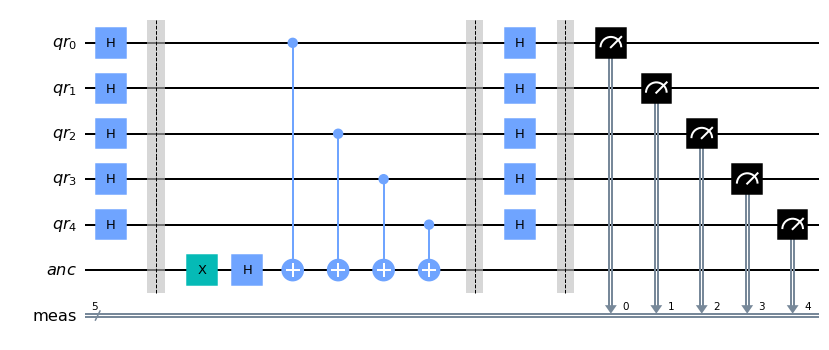

In [7]:
s = '11101'
n = 5
qr = QuantumRegister(n, 'qr')
anc = QuantumRegister(1, 'anc')
meas = ClassicalRegister(n, 'meas')
bv = QuantumCircuit(qr, anc, meas)
bv.h(qr)
bv.barrier()

bv.x(anc)
bv.h(anc)
s = s[::-1]
for qn in range(n):
    if s[qn] == '1':
        bv.cx(qr[qn],anc)

bv.barrier()
bv.h(qr)
bv.barrier()
bv.measure(qr,meas)
bv.draw('mpl')

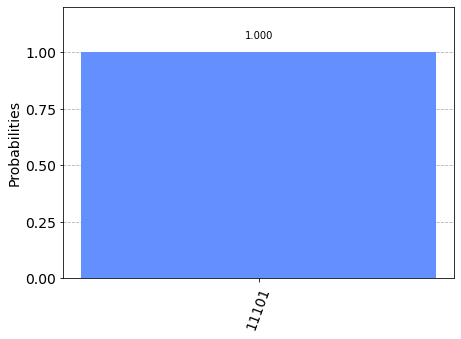

In [8]:
job = execute(bv, qmbackend, shots=1)
result = job.result()
plot_histogram(result.get_counts())